# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

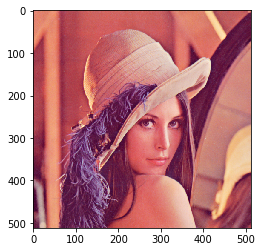

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [5]:
def median_filter(img, ksize): # изображение и размер медианного фильтра (всегда нечетный)
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                #np.median()
                result[row, col, channel] = img[row, col, channel]
                # TODO: определяем текущее положение окна в координатах изображения
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
    return result

In [9]:
np.median(img[100:105, 200:205, 0])

113.0

## Добавляем случайный шум на изображение

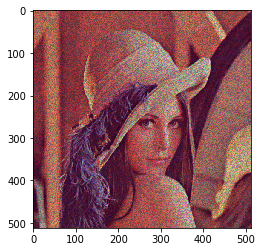

In [6]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float)) # np.random.uniform - равномерный шум
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [8]:
from ipywidgets import interact

def median_filter_show(ksize = 7):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=7, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…